# TITLE:- TESLA STOCK PRICE PREDICTION USING DEEP LEARNING (SimpleRNN & LSTM)

# Project Objective:-
The objective of this project is to predict the future closing price of Tesla stock using historical price data.
Time-series deep learning models such as SimpleRNN and LSTM are used to learn patterns from sequential stock data.
The models are trained to forecast 1-day, 5-day, and 10-day future price movements.
Model performance is evaluated and compared using Mean Squared Error (MSE) and RMSE.

# STEP 1:- DATA LOADING AND INSPECTION

In [2]:
import pandas as pd
import numpy as np

# Load the Tesla stock dataset
df = pd.read_csv("data/TSLA.csv")

# Display first 5 rows
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [3]:
# Check number of rows and columns
df.shape

(2416, 7)

In [4]:
# Check column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [5]:
# Convert Date column from String to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index
df.set_index('Date', inplace=True)

# Check date range
print("Start Date:", df.index.min())
print("End Date:", df.index.max())

Start Date: 2010-06-29 00:00:00
End Date: 2020-02-03 00:00:00


In [6]:
# Check missing values
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# STEP 2:- EXPLORATORY DATA ANALYSIS
The purpose of Exploratory Data Analysis (EDA) is to understand the structure, patterns, and behavior of the data before building models.
It helps identify trends, relationships, missing values, outliers, and data quality issues so that appropriate preprocessing and modeling techniques can be applied

# 1. Closing Price Trend Over Time
This plot visualizes the historical trend of Tesla’s closing stock price over time.
It helps in understanding the overall price movement, long-term trends, and periods of volatility in the stock.

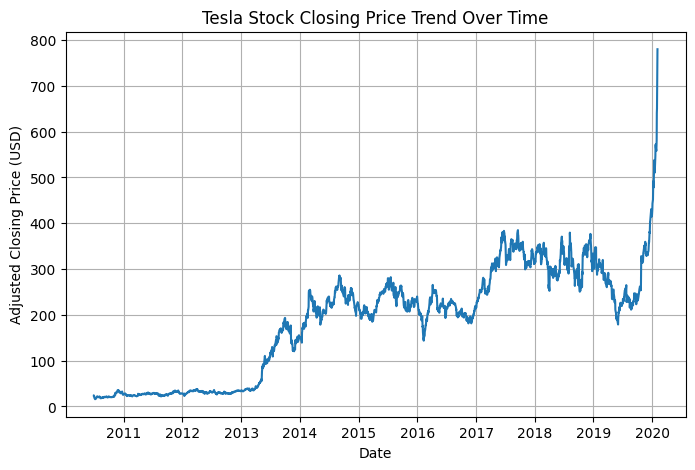

In [14]:
# In This step, we will import the modules matplotlib used to plot insights
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 5)) # This step creates the dimensions for the plot
plt.plot(df.index, df['Adj Close']) # This fetches the two target variables-- index (date as X axis) and Adj Close (as Y axis)
plt.title("Tesla Stock Closing Price Trend Over Time") # This creates the title for the plot
plt.xlabel("Date") # This creates the title for X Axis
plt.ylabel("Adjusted Closing Price (USD)") # This creates the title for Y Axis
plt.grid(True) # This is to enable the structure for the plot using grids
plt.show()

# Outcome:-
Tesla’s trading volume is low and stable in the early years, indicating limited market activity.

There are frequent spikes in volume, usually corresponding to major price movements or news events.

Toward the later years, volume increases significantly, showing growing investor interest and higher market participation.

# 2. Volume vs Closing Price
This plot shows the relationship between trading volume and Tesla’s closing stock price.
It helps in understanding how trading activity (number of shares traded) varies with price movements and highlights periods of high investor interest or strong market reactions.

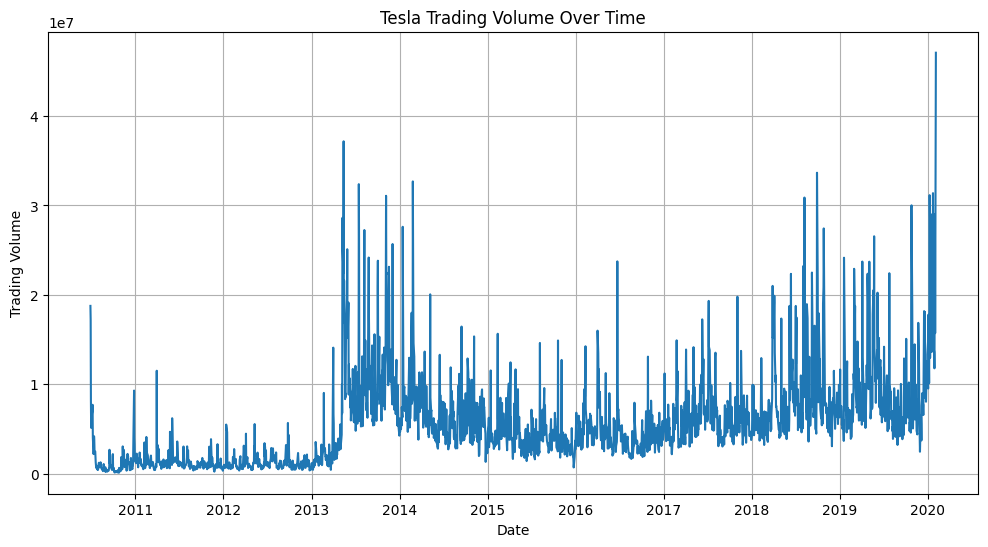

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volume'], label='Volume')
plt.title("Tesla Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Trading Volume")
plt.grid(True)
plt.show()

# Outcome:-
Tesla’s stock price shows a strong overall upward trend over the years.

There are periods of high volatility, with noticeable ups and downs in the mid-years.

Toward the end, the stock experiences a sharp price surge, indicating rapid growth and strong market momentum.

# 3. Moving Averages (Trend Smoothing)
This plot shows moving averages of Tesla’s stock price over time.
It helps in smoothing short-term fluctuations, making it easier to identify the overall trend, trend changes, and potential support or resistance levels in the stock price.

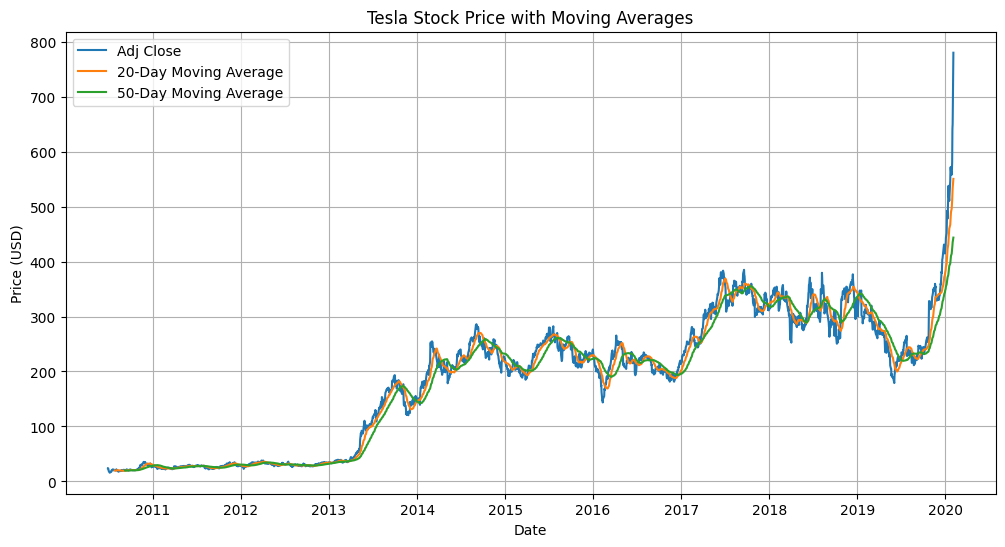

In [16]:
# This step creates two new columns (MA_20 and MA_50)
# The new cloumns use the rolling function to look at the prices for the previous 20 and 50 days for each day
# So for every day, the new columns roll back to look at the previous prices for 20 and 50 days
# Then this column stores the mean value of the prices for 20 and 50 days

df['MA_20'] = df['Adj Close'].rolling(window=20).mean()
df['MA_50'] = df['Adj Close'].rolling(window=50).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Adj Close'], label='Adj Close')
plt.plot(df.index, df['MA_20'], label='20-Day Moving Average')
plt.plot(df.index, df['MA_50'], label='50-Day Moving Average')
plt.title("Tesla Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

# Objective:-
Tesla’s stock shows a clear long-term upward trend, confirmed by the rising 50-day moving average.

The 20-day moving average closely follows price changes, highlighting short-term fluctuations and trend shifts.

Toward the end, both moving averages rise sharply, indicating strong bullish momentum.

# 4. Volatility & Outlier Detection (Visual)
This plot highlights sudden price fluctuations and unusual movements in Tesla’s stock.
It helps in identifying high-volatility periods and outliers, which often occur due to major news, market shocks, or abnormal trading behavior.

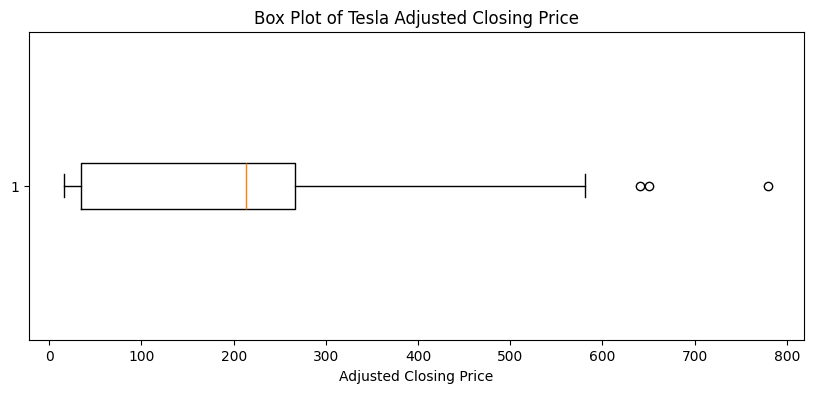

In [17]:
plt.figure(figsize=(10, 4))
plt.boxplot(df['Adj Close'], vert=False)
plt.title("Box Plot of Tesla Adjusted Closing Price")
plt.xlabel("Adjusted Closing Price")
plt.show()

# Outcome:-
Most of Tesla’s adjusted closing prices are concentrated within a mid-range, as shown by the box (normal price behavior).

The long whiskers indicate periods of high volatility, where prices varied significantly.

The dots outside the whiskers represent outliers, showing unusually high prices caused by sharp market movements or exceptional events.